In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
dataset=pd.read_csv('AAPL.csv')

In [3]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,5/27/2015,130.34,132.260,130.05,132.045,121.682558,45833246
1,5/28/2015,131.86,131.950,131.10,131.780,121.438354,30733309
2,5/29/2015,131.23,131.450,129.90,130.280,120.056069,50884452
3,6/1/2015,131.20,131.390,130.05,130.535,120.291057,32112797
4,6/2/2015,129.86,130.655,129.32,129.960,119.761181,33667627


In [4]:
dataset['Date']=pd.to_datetime(dataset.Date)

In [5]:
dataset.shape

(1258, 7)

In [6]:

dataset= dataset.drop('Adj Close', axis=1)

In [7]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,2015-05-27,130.34,132.260,130.05,132.045,45833246
1,2015-05-28,131.86,131.950,131.10,131.780,30733309
2,2015-05-29,131.23,131.450,129.90,130.280,50884452
3,2015-06-01,131.20,131.390,130.05,130.535,32112797
4,2015-06-02,129.86,130.655,129.32,129.960,33667627


In [8]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

C:\Users\Atharv\AppData\Local\Temp\ipykernel_8560\3802605992.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


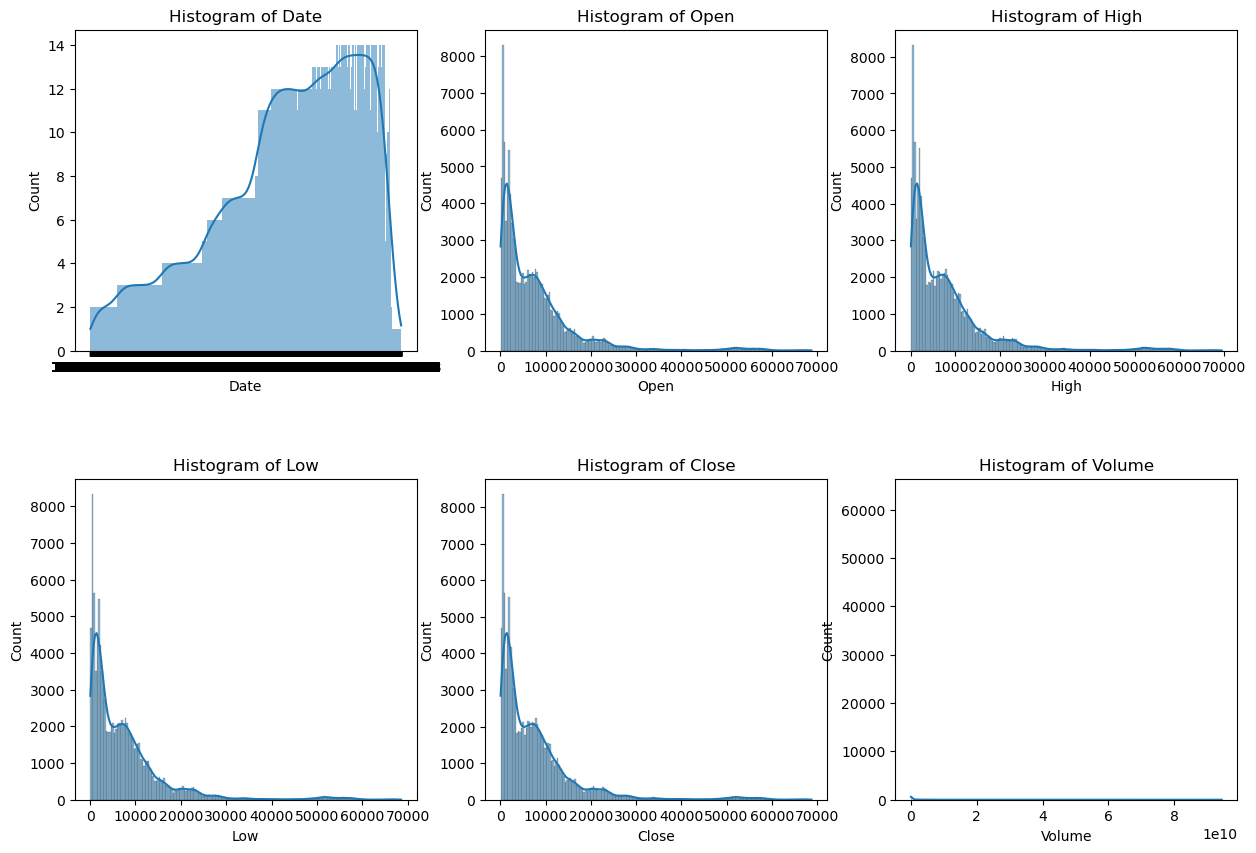

In [9]:

    
    
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read your dataset
data = pd.read_csv('indexData.csv')

# Replace 'num_col1', 'num_col2', etc. with your actual numerical column names
numerical_columns = ['Date', 'Open', 'High', 'Low', 'Close','Volume']

# Set up the layout of subplots
plt.figure(figsize=(15, 10))
grid = plt.GridSpec(2, 3, hspace=0.4)

for i, col in enumerate(numerical_columns):
    # Create a subplot for each numerical column
    plt.subplot(grid[i // 3, i % 3])
    
    # Plot histogram with density plot
    sns.histplot(data[col], kde=True)
    plt.title(f"Histogram of {col}")
    
plt.tight_layout()
plt.show()



In [9]:
# Positive skew so we decide to find median to fill null values


In [10]:
dataset=dataset.fillna(dataset.median())
dataset

C:\Users\Atharv\AppData\Local\Temp\ipykernel_1872\1004406884.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  dataset=dataset.fillna(dataset.median())


,Date,Open,High,Low,Close,Volume
0,2015-05-27,130.34,132.260,130.0500,132.045,45833246
1,2015-05-28,131.86,131.950,131.1000,131.780,30733309
2,2015-05-29,131.23,131.450,129.9000,130.280,50884452
3,2015-06-01,131.20,131.390,130.0500,130.535,32112797
4,2015-06-02,129.86,130.655,129.3200,129.960,33667627
...,...,...,...,...,...,...
1253,2020-05-18,313.17,316.500,310.3241,314.960,33843125
1254,2020-05-19,315.03,318.520,313.0100,313.140,25432385
1255,2020-05-20,316.68,319.520,316.2000,319.230,27876215
1256,2020-05-21,318.66,320.890,315.8700,316.850,25672211


In [11]:
dataset.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1258 non-null   datetime64[ns]
 1   Open    1258 non-null   float64       
 2   High    1258 non-null   float64       
 3   Low     1258 non-null   float64       
 4   Close   1258 non-null   float64       
 5   Volume  1258 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.1 KB


In [13]:
dataset.describe()
# Use to display min , max values , calcualte standerd daviation

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,167.548266,169.230475,166.039780,167.723998,3.500397e+07
std,56.612707,57.500128,56.006773,56.850796,1.729100e+07
min,90.000000,91.670000,89.470000,90.340000,1.136204e+07
25%,116.482500,117.405000,115.602500,116.327500,2.359205e+07
50%,160.345000,162.080000,158.974250,160.485000,3.064771e+07
75%,199.520000,201.277500,198.170000,199.785000,4.100487e+07
max,324.730000,327.850000,323.350000,327.200000,1.622063e+08


In [14]:
print(len(dataset))

1258


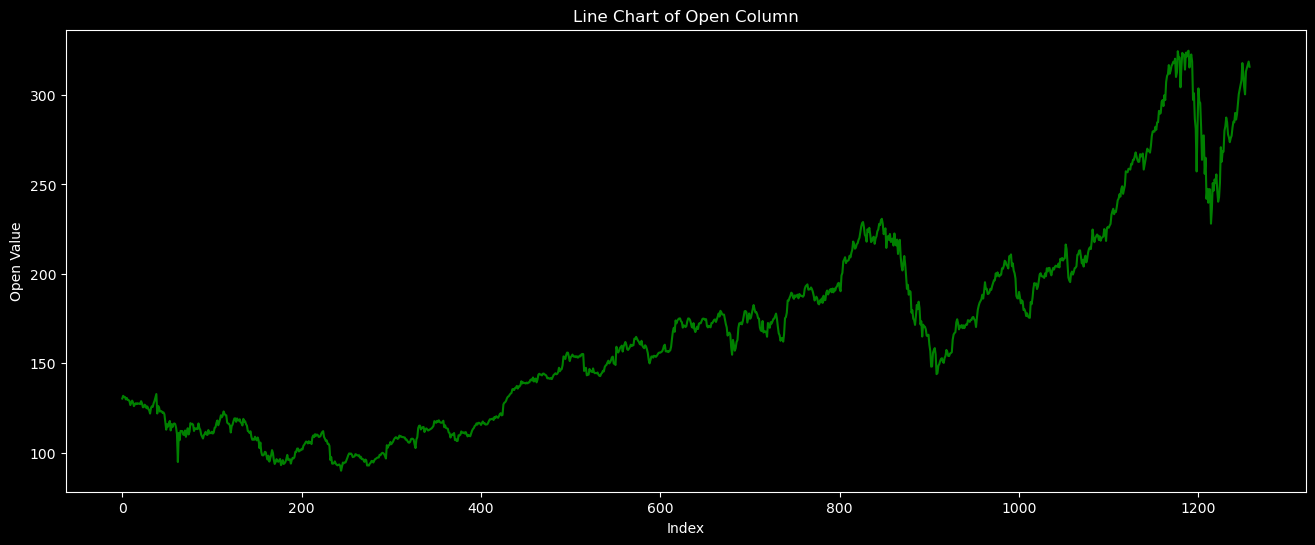

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Read your dataset
data = pd.read_csv('AAPL.csv')
plt.style.use('dark_background')
# Set the style to a dark background


# Create the line chart for the 'Open' column
plt.figure(figsize=(16, 6))
plt.plot(data['Open'] ,color='green')
plt.title('Line Chart of Open Column')
plt.xlabel('Index')
plt.ylabel('Open Value')
plt.show()


In [19]:
X=dataset[['Open','High','Low','Volume']]
y= dataset['Close']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

print('Shape of X_train= ',X_train.shape)
print('Shape of y_train= ',y_train.shape)
print('Shape of X_test= ',X_test.shape)
print('Shape of y_test= ',y_test.shape)

Shape of X_train=  (1006, 4)
Shape of y_train=  (1006,)
Shape of X_test=  (252, 4)
Shape of y_test=  (252,)


# Apply Random Forest Regressor

In [21]:

#regressor= LinearRegression()


In [24]:
regressor = RandomForestRegressor(
    n_estimators=70, max_depth=2, max_features="sqrt", random_state=42)


In [25]:
regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=2, max_features='sqrt', n_estimators=70,
                      random_state=42)

In [2]:
regressor.score(X_test,y_test)
#print("Accuracy: %.2f%%" % (regressor * 100.0))

NameError: name 'regressor' is not defined

In [27]:
#print(regressor.coef_)

In [28]:
#print(regressor.intercept_)

In [29]:
# make the prediction
y_pred = regressor.predict(X_test)

In [30]:
# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Squared Error is : ",mse)
print("Root Mean Squared Error is : ",rmse)

Mean Squared Error is :  181.83609365140236
Root Mean Squared Error is :  13.484661421459657


In [31]:
predicted=regressor.predict(X_test)

In [32]:
print(X_test)

        Open     High     Low    Volume
256    99.02   99.540   98.33  29173285
252    98.67   99.740   98.11  38642108
120   115.20  115.570  112.27  45812403
331   115.12  116.130  114.04  79886911
1179  320.93  322.680  308.29  49897096
...      ...      ...     ...       ...
795   190.68  191.960  189.56  15989365
1235  273.61  277.900  272.20  29264342
278    95.49   96.465   95.33  26026540
453   139.30  139.650  138.84  15309065
468   143.25  144.890  143.17  19891354

[252 rows x 4 columns]


In [33]:
predicted.shape

(252,)

In [34]:
dframe=pd.DataFrame(y_test,predicted)

In [35]:
dfr=pd.DataFrame({'Actual Price': y_test,'Predicted Price':predicted})

In [36]:
print(dfr)

      Actual Price  Predicted Price
256          98.46       110.898768
252          99.62       110.898768
120         112.34       110.898768
331         114.92       110.898768
1179        309.51       287.274948
...            ...              ...
795         191.61       203.026097
1235        276.10       287.274948
278          95.89       110.898768
453         138.99       157.454812
468         144.77       161.550201

[252 rows x 2 columns]


In [37]:
dfr.head(25)

,Actual Price,Predicted Price
256,98.46,110.898768
252,99.62,110.898768
120,112.34,110.898768
331,114.92,110.898768
1179,309.51,287.274948
695,178.12,164.652655
506,153.67,161.550201
990,209.15,207.103673
594,154.48,161.550201
25,126.60,110.898768


In [38]:
graph=dfr.head()

<Axes: >

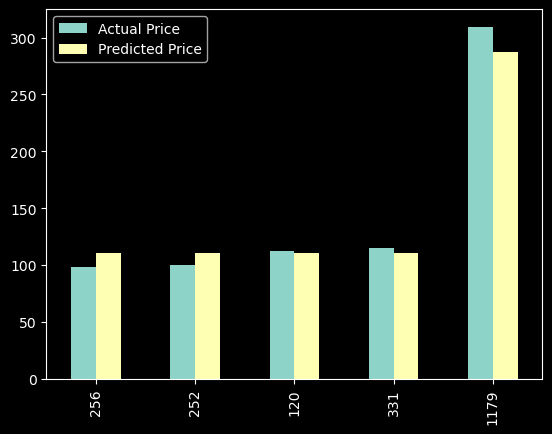

In [140]:
    graph.plot(kind='bar')

# Apply Linear Regressor

In [143]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

In [161]:
ridge_model = Ridge(alpha=9.0)  # You can adjust alpha to control the regularization strength
ridge_model.fit(X_train, y_train)

Ridge(alpha=9.0)

In [162]:
# Create Lasso Regression model with regularization parameter alpha
lasso_model = Lasso(alpha=0.09)  # You can adjust alpha to control the regularization strength
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.09)

In [164]:
ridge_score = r2_score(y_test, ridge_pred)
lasso_score = r2_score(y_test, lasso_pred)

print("Ridge Regression R-squared score:", ridge_score)
print("Lasso Regression R-squared score:", lasso_score)

Ridge Regression R-squared score: 0.9982989861945187
Lasso Regression R-squared score: 0.9982987870916903


In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score

# Assume you have X (features) and y (target) data

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select top k best features using SelectKBest with f_regression
k = 1 # Choose the number of top features to keep
feature_selector = SelectKBest(f_regression, k=k)
X_train_selected = feature_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = feature_selector.transform(X_test_scaled)

# Create Linear Regression model
regressor = LinearRegression()

# Fit the model on the selected features
regressor.fit(X_train_selected, y_train)

# Predict on test data
y_pred = regressor.predict(X_test_selected)

# Calculate R-squared score on the test data
score = r2_score(y_test, y_pred)

print("R-squared score:", score)


R-squared score: 0.9982990081526764


In [145]:
X = dataset[['Open']]  # Predictor feature (independent variable)
y = dataset['Close']   # Target variable (dependent variable)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
model = LinearRegression()

In [148]:
model.fit(X_train, y_train)

LinearRegression()

In [149]:
model.score(X_test,y_test)

0.9982990081526764

In [150]:
y_pred = model.predict(X_test)


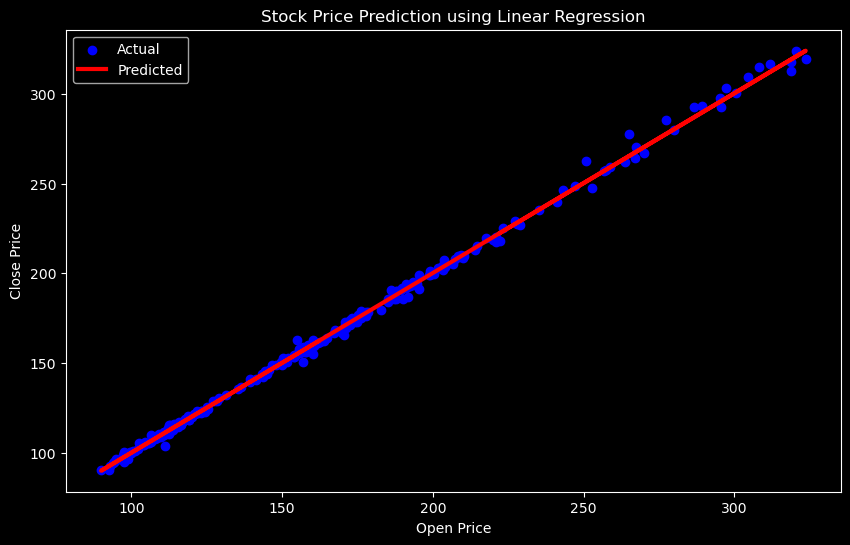

In [151]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Predicted')
plt.title('Stock Price Prediction using Linear Regression')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Thank You!!